In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/water_fraction/merged_water_fraction.csv'
data = pd.read_csv(file_path)

# Drop the specified columns
columns_to_ignore = [
    "top_left_lat", "top_left_lon", "top_right_lat", "top_right_lon",
    "bottom_left_lat", "bottom_left_lon", "bottom_right_lat", "bottom_right_lon",
    "satellite","date","sample","ddm"]
data = data.drop(columns=columns_to_ignore)

# Separate features (X) and target variable (Y)
X = data.drop(columns=["water_fraction"])
y = data["water_fraction"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.004688079375004042
Feature Importances:
             Feature  Importance
1             sp_lat    0.671907
0             sp_lon    0.228780
2            ddm_snr    0.030557
7  gps_ant_gain_db_i    0.018379
4     tx_to_sp_range    0.015868
5     rx_to_sp_range    0.012997
6       sp_inc_angle    0.011684
3  gps_tx_power_db_w    0.009828


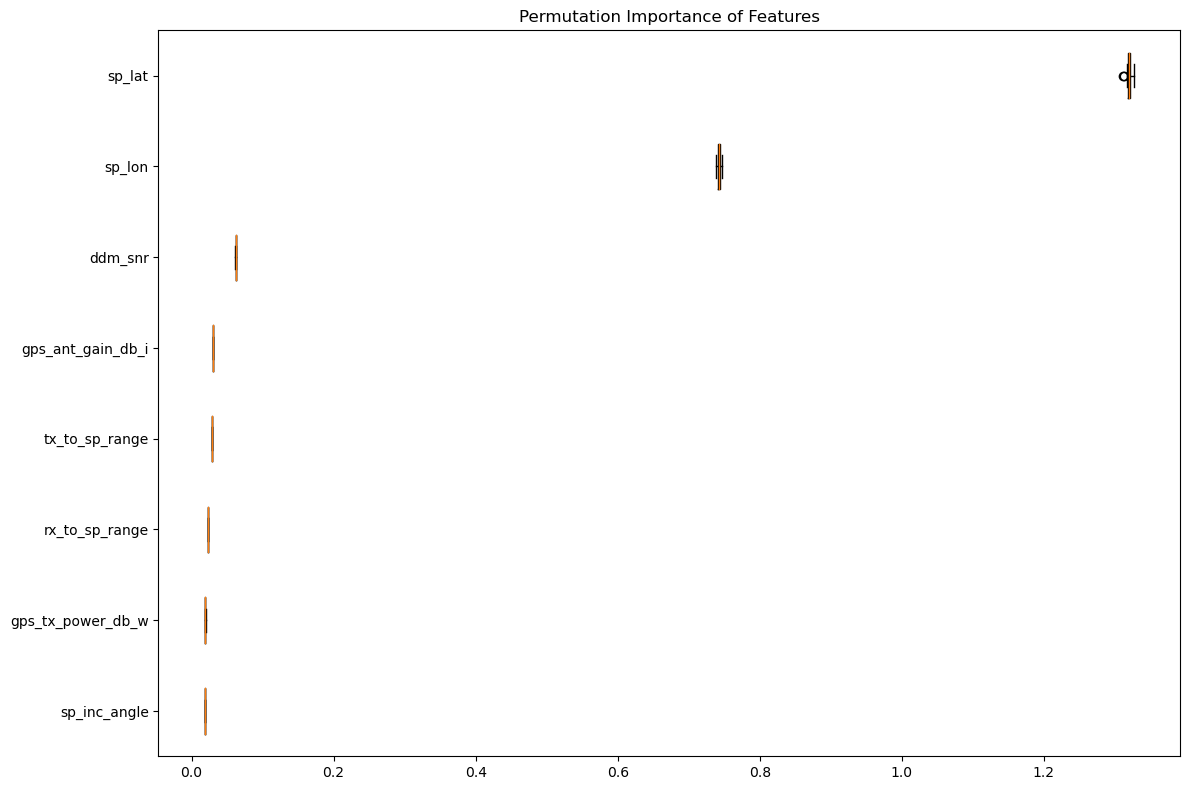

In [2]:
# Train the Random Forest model
rf_model_without_location = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=8)
rf_model_without_location.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model_without_location.predict(X_test)

# Evaluate the model
mse_without_location = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_without_location}")

# Feature importance
feature_importances_without_location = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model_without_location.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(feature_importances_without_location)



result = permutation_importance(rf_model_without_location, X_test, y_test, n_repeats=20, random_state=42, n_jobs=1)

# Organizing the results
perm_sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_test.columns[perm_sorted_idx])
plt.title("Permutation Importance of Features")
plt.tight_layout()
plt.show()

Mean Squared Error (MSE): 0.004688079375004042
Root Mean Squared Error (RMSE): 0.06846955071419734
Mean Absolute Error (MAE): 0.03291300577952906
R-squared: 0.9631757416651905
Cross-Validated MSE: 0.01862537749355836
Cross-Validated RMSE: 0.13647482366194272
Feature Importances:
             Feature  Importance
1             sp_lat    0.671907
0             sp_lon    0.228780
2            ddm_snr    0.030557
7  gps_ant_gain_db_i    0.018379
4     tx_to_sp_range    0.015868
5     rx_to_sp_range    0.012997
6       sp_inc_angle    0.011684
3  gps_tx_power_db_w    0.009828


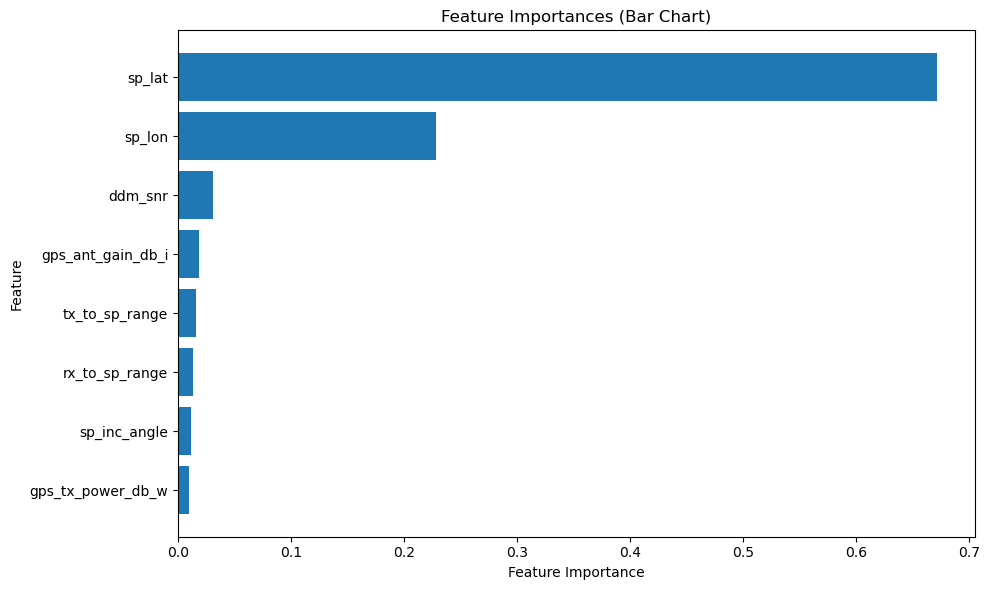

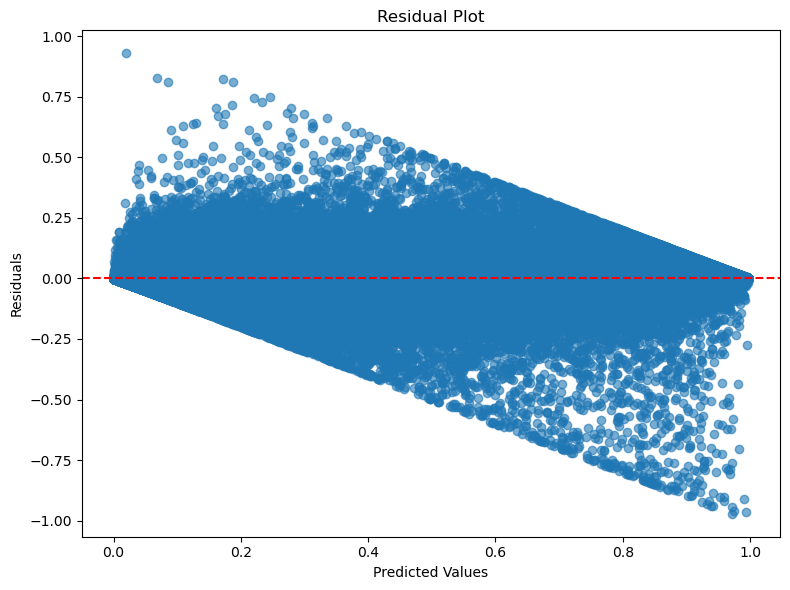

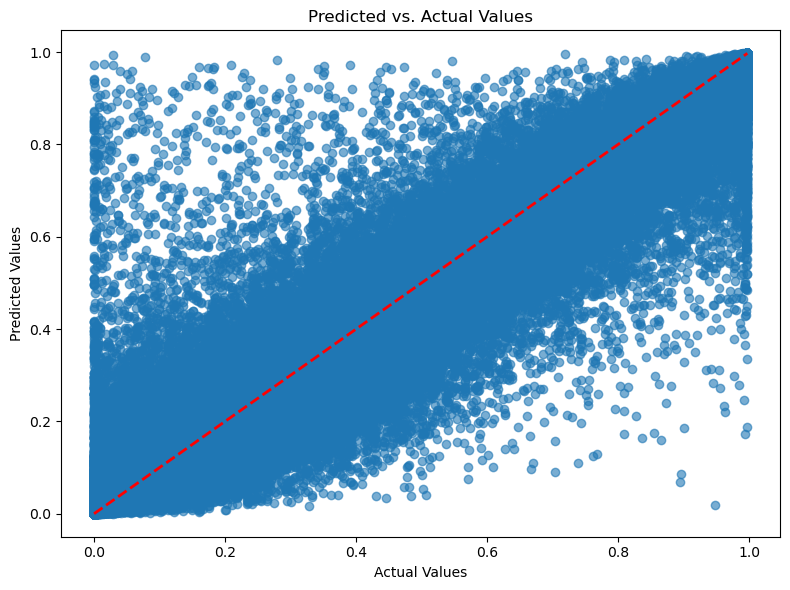

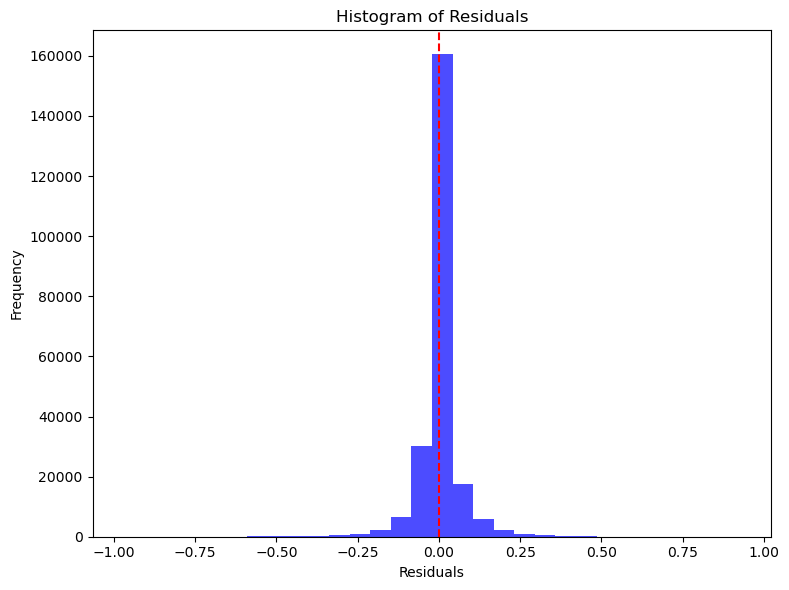

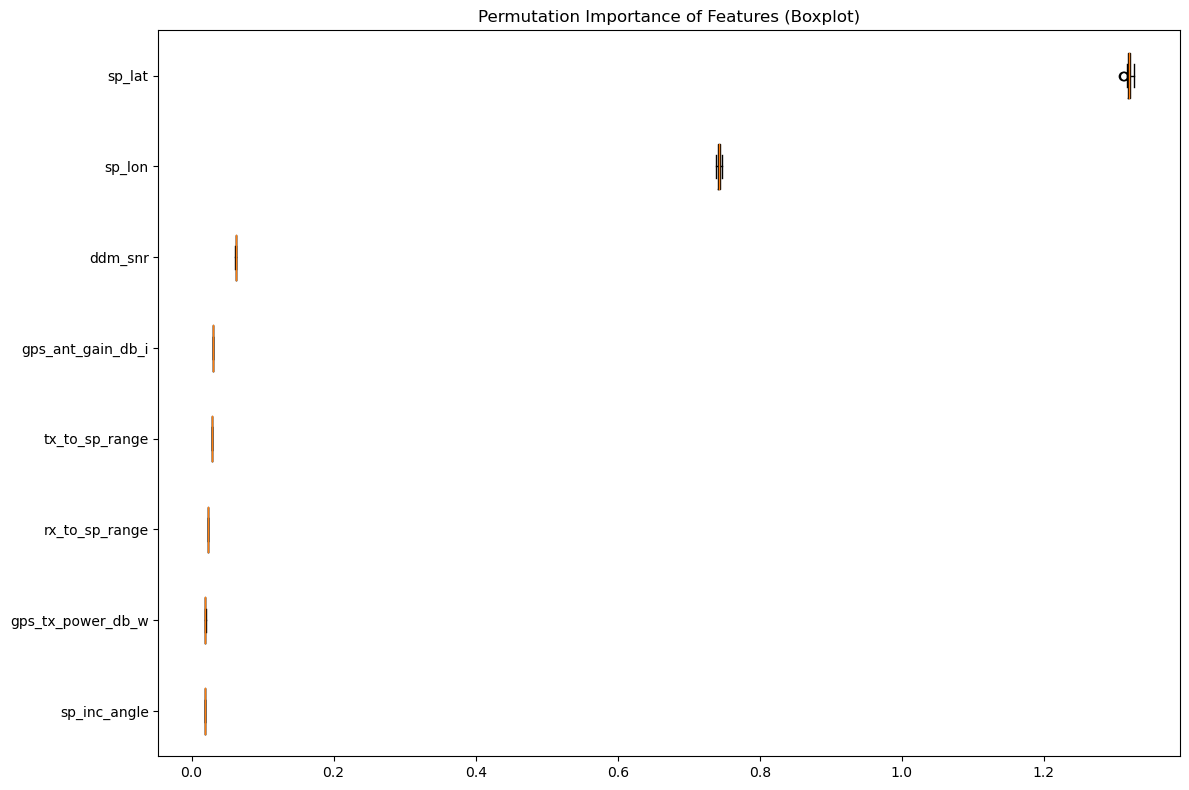

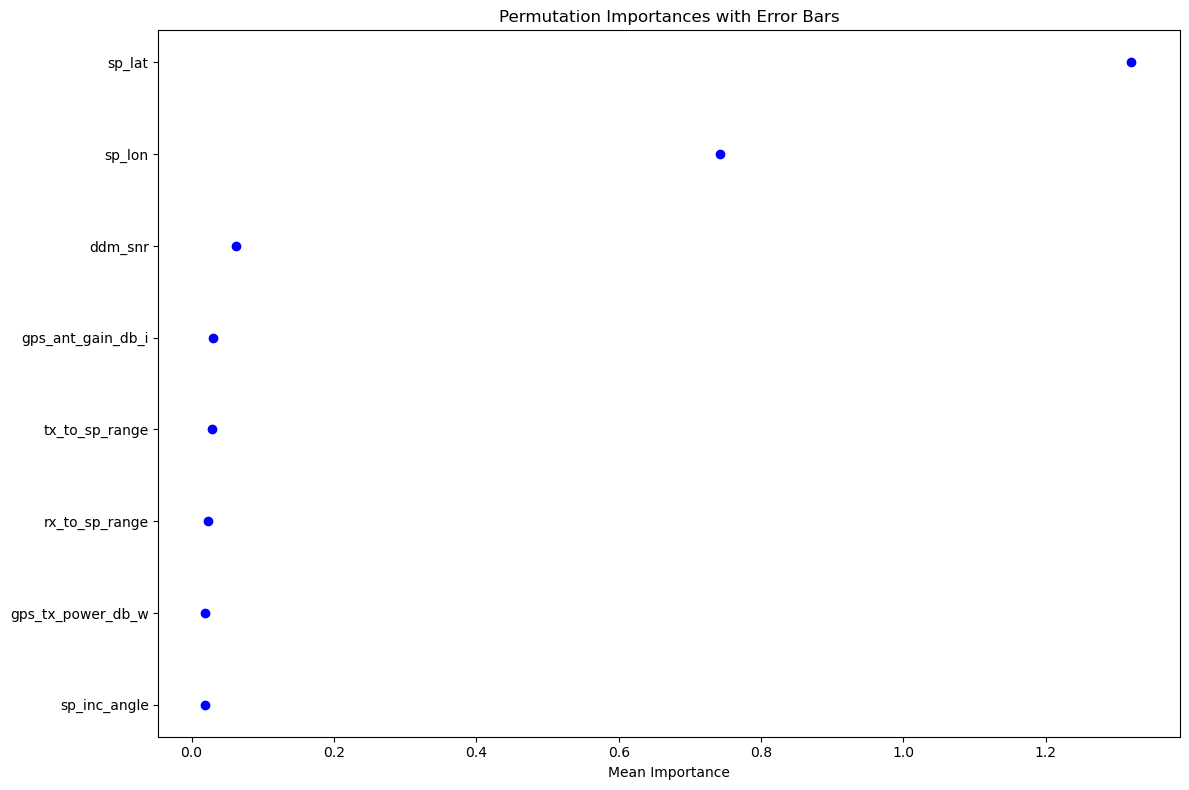

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
)
from sklearn.model_selection import cross_val_score

# Make predictions on the test set
y_pred = rf_model_without_location.predict(X_test)

# Evaluate the model using additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

# Cross-Validation Scores
cv_scores = cross_val_score(rf_model_without_location, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_scores)
cv_rmse = np.sqrt(cv_mse)
print(f"Cross-Validated MSE: {cv_mse}")
print(f"Cross-Validated RMSE: {cv_rmse}")

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model_without_location.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(feature_importances)

# Visualizations
# 1. Feature Importance Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances (Bar Chart)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 2. Residual Analysis
residuals = y_test - y_pred

# 2.1 Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

# 2.2 Prediction vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.tight_layout()
plt.show()

# 2.3 Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.tight_layout()
plt.show()

# 3. Permutation Importance
result = permutation_importance(rf_model_without_location, X_test, y_test, n_repeats=20, random_state=42, n_jobs=1)

# 3.1 Boxplot for Permutation Importance
perm_sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_test.columns[perm_sorted_idx])
plt.title("Permutation Importance of Features (Boxplot)")
plt.tight_layout()
plt.show()

# 3.2 Permutation Importance with Error Bars
plt.figure(figsize=(12, 8))
plt.errorbar(
    result.importances_mean[perm_sorted_idx],
    X_test.columns[perm_sorted_idx],
    xerr=result.importances_std[perm_sorted_idx],
    fmt='o',
    color='blue',
    ecolor='lightgray',
    elinewidth=3,
    capsize=0
)
plt.title("Permutation Importances with Error Bars")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()

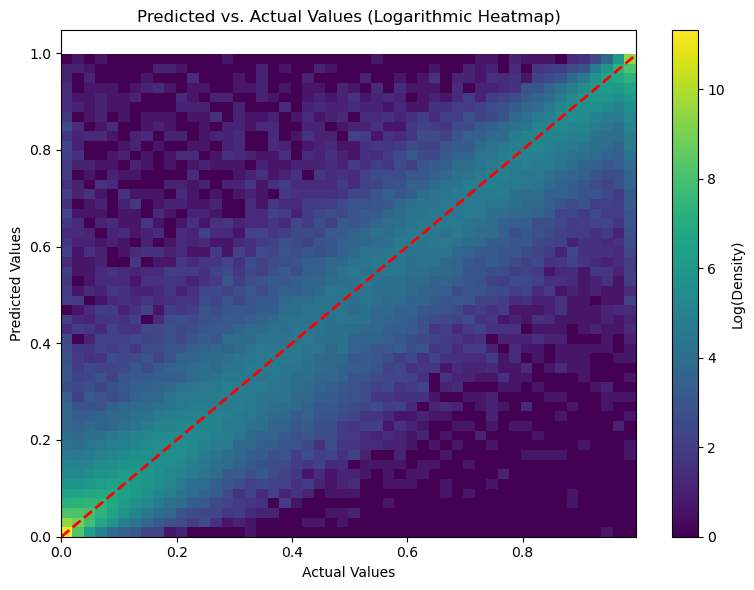

In [7]:
import numpy as np

# Prediction vs. Actual Values with Logarithmic Heatmap
plt.figure(figsize=(8, 6))

# Create a 2D histogram for density estimation
heatmap, xedges, yedges = np.histogram2d(y_test, y_pred, bins=50)

# Apply logarithmic transformation to the density
log_heatmap = np.log1p(heatmap)  # Use log1p to avoid log(0)

# Plot the heatmap
plt.imshow(
    log_heatmap.T,  # Transpose to align axes correctly
    origin='lower',  # Ensure the origin is at the bottom-left
    aspect='auto',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='viridis'
)

# Add colorbar to show density scale
plt.colorbar(label='Log(Density)')

# Add labels and title
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Logarithmic Heatmap)")
plt.tight_layout()
plt.show()

In [64]:
import pandas as pd

# Define base file paths
input_base = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/cygnss_data_month_{:02d}.csv'
output_base = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_with_location/water_fraction_prediction_23_{}.csv'

# Loop through months 10 to 12
for month in range(10, 13):
    input_file = input_base.format(month)
    output_file = output_base.format(month)
    print(f"Processing: {input_file}")

    try:
        # Process the dataset in chunks
        chunksize = 100000
        output_data = pd.DataFrame()  # Initialize empty DataFrame

        with pd.read_csv(input_file, chunksize=chunksize, low_memory=False) as reader:
            for chunk in reader:
                try:
                    chunk_data = chunk.copy()

                    # Process 'date' column
                    if 'date' in chunk_data.columns:
                        chunk_data['date'] = chunk_data['date'].astype(str).replace('', '0000-00-00')
                        chunk_data['month'] = chunk_data['date'].str.slice(5, 7).apply(lambda x: int(x) if x.isdigit() else 0)

                    # Align features with the training dataset
                    chunk_data = chunk_data.reindex(columns=X.columns, fill_value=0)

                    # Make predictions
                    water_fraction_predictions = rf_model_without_location.predict(chunk_data)

                    # Add predictions to the chunk
                    chunk['water_fraction_predicted'] = water_fraction_predictions

                    # Keep only the desired columns
                    chunk_output = chunk[['date', 'sp_lon', 'sp_lat', 'water_fraction_predicted']]
                    output_data = pd.concat([output_data, chunk_output], ignore_index=True)
                except Exception as e:
                    print(f"Error processing chunk: {e}")
                    continue

        # Save the final output to a CSV file
        output_data.to_csv(output_file, index=False)
        print(f"Predictions for month {month:02d} saved to {output_file}")

    except FileNotFoundError:
        print(f"File not found for month {month:02d}: {input_file}")
    except pd.errors.ParserError as e:
        print(f"Parsing error for month {month:02d}: {e}")
    except Exception as e:
        print(f"An error occurred for month {month:02d}: {type(e).__name__} - {e}")
        import traceback
        traceback.print_exc()

Processing: /Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/cygnss_data_month_10.csv
An error occurred for month 10: OSError - [Errno 9] Bad file descriptor
Processing: /Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/cygnss_data_month_11.csv


Traceback (most recent call last):
  File "/Users/hyou/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/io/parsers/readers.py", line 1704, in read
    ) = self._engine.read(  # type: ignore[attr-defined]
  File "/Users/hyou/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/io/parsers/c_parser_wrapper.py", line 239, in read
    data = self._reader.read(nrows)
  File "pandas/_libs/parsers.pyx", line 796, in pandas._libs.parsers.TextReader.read
  File "pandas/_libs/parsers.pyx", line 887, in pandas._libs.parsers.TextReader._read_rows
StopIteration

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/var/folders/75/726b68j900v0z8bv7slw21zm0000gt/T/ipykernel_90074/1329108099.py", line 19, in <module>
    for chunk in reader:
  File "/Users/hyou/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/io/parsers/readers.py", line 1624, in __next__
    return self.get_chunk()
  File "/Users/hyou/miniconda3/envs/py38/lib/

An error occurred for month 11: OSError - [Errno 9] Bad file descriptor
Processing: /Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/cygnss_data_month_12.csv


Traceback (most recent call last):
  File "/var/folders/75/726b68j900v0z8bv7slw21zm0000gt/T/ipykernel_90074/1329108099.py", line 45, in <module>
    output_data.to_csv(output_file, index=False)
  File "/Users/hyou/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/generic.py", line 3772, in to_csv
    return DataFrameRenderer(formatter).to_csv(
  File "/Users/hyou/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/io/formats/format.py", line 1186, in to_csv
    csv_formatter.save()
  File "/Users/hyou/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/io/formats/csvs.py", line 259, in save
    self._save()
  File "/Users/hyou/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/io/common.py", line 138, in __exit__
    self.close()
  File "/Users/hyou/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/io/common.py", line 130, in close
    handle.close()
OSError: [Errno 9] Bad file descriptor


An error occurred for month 12: OSError - [Errno 9] Bad file descriptor


Traceback (most recent call last):
  File "/Users/hyou/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/io/parsers/readers.py", line 1704, in read
    ) = self._engine.read(  # type: ignore[attr-defined]
  File "/Users/hyou/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/io/parsers/c_parser_wrapper.py", line 239, in read
    data = self._reader.read(nrows)
  File "pandas/_libs/parsers.pyx", line 796, in pandas._libs.parsers.TextReader.read
  File "pandas/_libs/parsers.pyx", line 887, in pandas._libs.parsers.TextReader._read_rows
StopIteration

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/var/folders/75/726b68j900v0z8bv7slw21zm0000gt/T/ipykernel_90074/1329108099.py", line 19, in <module>
    for chunk in reader:
  File "/Users/hyou/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/io/parsers/readers.py", line 1624, in __next__
    return self.get_chunk()
  File "/Users/hyou/miniconda3/envs/py38/lib/

In [3]:
import pandas as pd

# Define base file paths
input_base = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/cygnss_data_month_{:02d}.csv'
output_base = r'/Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_with_location/water_fraction_prediction_23_{}.csv'

# Loop through months 10 to 12
for month in [10,11,12]:
    input_file = input_base.format(month)
    output_file = output_base.format(month)
    print(f"Processing: {input_file}")

    try:
        # Process the dataset in chunks
        chunksize = 100000
        output_data = pd.DataFrame()  # Initialize empty DataFrame

        with pd.read_csv(input_file, chunksize=chunksize, low_memory=False) as reader:
            for chunk in reader:
                try:
                    chunk_data = chunk.copy()

                    # Process 'date' column
                    if 'date' in chunk_data.columns:
                        chunk_data['date'] = chunk_data['date'].astype(str).replace('', '0000-00-00')
                        chunk_data['month'] = chunk_data['date'].str.slice(5, 7).apply(lambda x: int(x) if x.isdigit() else 0)

                    # Align features with the training dataset
                    chunk_data = chunk_data.reindex(columns=X.columns, fill_value=0)

                    # Make predictions
                    water_fraction_predictions = rf_model_without_location.predict(chunk_data)

                    # Add predictions to the chunk
                    chunk['water_fraction_predicted'] = water_fraction_predictions

                    # Keep only the desired columns
                    chunk_output = chunk[['date', 'sp_lon', 'sp_lat', 'water_fraction_predicted']]
                    output_data = pd.concat([output_data, chunk_output], ignore_index=True)
                except Exception as e:
                    print(f"Error processing chunk: {e}")
                    continue

        # Save the final output to a CSV file
        output_data.to_csv(output_file, index=False)
        print(f"Predictions for month {month:02d} saved to {output_file}")

    except FileNotFoundError:
        print(f"File not found for month {month:02d}: {input_file}")
    except pd.errors.ParserError as e:
        print(f"Parsing error for month {month:02d}: {e}")
    except Exception as e:
        print(f"An error occurred for month {month:02d}: {type(e).__name__} - {e}")
        import traceback
        traceback.print_exc()

Processing: /Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/cygnss_data_month_10.csv
Predictions for month 10 saved to /Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_with_location/water_fraction_prediction_23_10.csv
Processing: /Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/cygnss_data_month_11.csv
Predictions for month 11 saved to /Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_with_location/water_fraction_prediction_23_11.csv
Processing: /Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/cygnss_data_month_12.csv
Predictions for month 12 saved to /Users/hyou/mnt/Public/CYGNSS_clip_csv/Merged_data/Random_forest_training_with_location/water_fraction_prediction_23_12.csv
